In [60]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\dbasava\\Desktop\\Darshan Doc\\5660\\BBC News Summary'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\001.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\002.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\003.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\004.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\005.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\006.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\007.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\008.txt
C:\Users\dbasava\Desktop\Darshan Doc\5660\BBC News Summary\BBC News Summary\News Articles\business\009.txt
C:\Users\dbasava\Desktop\Darshan Doc\

In [61]:
import pandas as pd #Dataframe Manipulation library
import numpy as np #Data Manipulation library

#sklearn modules for Feature Extraction & Modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
#Libraries for Plotting 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import joblib
import os
import glob

In [63]:
import glob

def load_data(folder_names, root_path):
    fileNames = [path + "/News Articles/" + folder + '/' + "*.txt"
        for path, folder in zip([root_path] * len(folder_names), folder_names)]
    doc_list = []
    tags = folder_names

    i = 0
    while i < len(fileNames):
        docs = fileNames[i]
        doc = glob.glob(docs)
        j = 0
        while j < len(doc):
            text = doc[j]
            with open(text, encoding="latin-1") as f:
                topic = docs.split('/')[len(docs.split('/')) - 2]
                lines = f.readlines()
                heading = lines[0].strip()
                body = ' '.join([l.strip() for l in lines[1:]])
                doc_list.append([topic, heading, body])
            j += 1
        print(f"Loading data from \033[1m{topic}\033[0m directory")
        i += 1

    print("\nEntire Data is loaded successfully")
    return doc_list


In [64]:
folder_names = ['business', 'entertainment', 'politics', 'sport', 'tech']
root_path = 'C:\\Users\\dbasava\\Desktop\\Darshan Doc\\5660\\BBC News Summary'
docs = load_data(folder_names=folder_names, root_path=root_path)

Loading data from business directory
Loading data from entertainment directory
Loading data from politics directory
Loading data from sport directory
Loading data from tech directory

Entire Data is loaded successfully


In [65]:
docs = pd.DataFrame(docs, columns = ['Category','Heading','Article'])
docs.head()

,Category,Heading,Article
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [66]:
tags_values = docs.Category.value_counts()
tags_values

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: Category, dtype: int64

In [67]:
#Creating a list of text belonging to individual category of articles

heading_sport = docs[docs["Category"]=='sport']["Heading"] 
collapsed_heading_sport =heading_sport.str.cat(sep = ' ') 

heading_business = docs[docs["Category"]=='business']["Heading"] 
collapsed_heading_business =heading_business.str.cat(sep = ' ') 

heading_politics = docs[docs["Category"]=='politics']["Heading"] 
collapsed_heading_politics =heading_politics.str.cat(sep = ' ') 

heading_tech = docs[docs["Category"]=='tech']["Heading"] 
collapsed_heading_tech =heading_tech.str.cat(sep = ' ') 

heading_entertainment = docs[docs["Category"]=='entertainment']["Heading"] 
collapsed_heading_entertainment =heading_entertainment.str.cat(sep = ' ') 

In [68]:
#Creating List of Stopwords
stopwords = set(STOPWORDS)

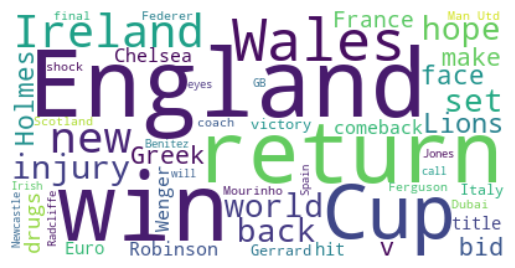

Word Cloud for business


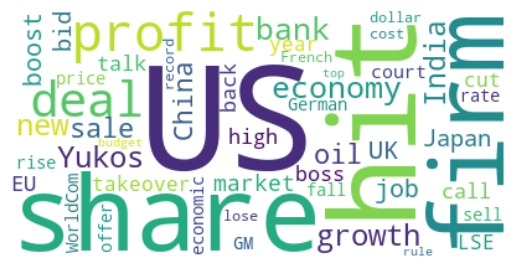

Word Cloud for politics


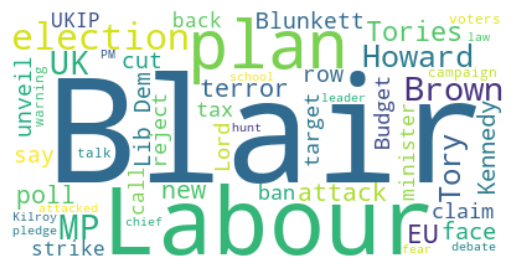

Word Cloud for tech


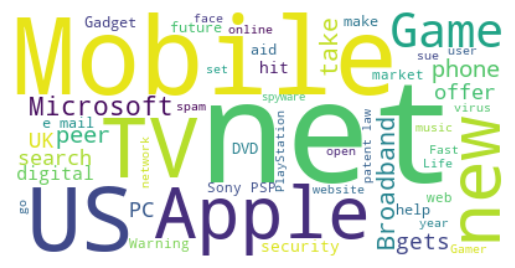

Word Cloud for entertainment


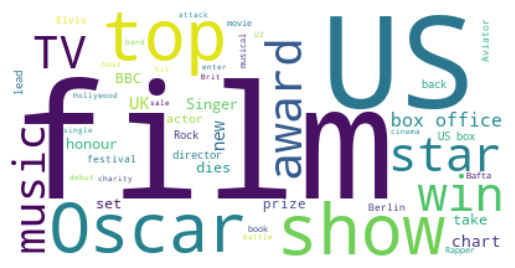

In [69]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_sport)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for business")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_business)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for politics")
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_politics)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for tech")
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_tech)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

print("Word Cloud for entertainment")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_entertainment)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
#Building pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()), 
])

In [71]:
x_train, x_test, y_train, y_test = train_test_split(docs['Heading'],docs['Category'],
                                                   random_state=42, test_size=0.2)
print(f"Size of input training data is {x_train.shape}")
print(f"Size of input test data is {x_test.shape}")
print(f"Size of output training data is {y_train.shape}")
print(f"Size of output test data is {y_test.shape}")

Size of input training data is (1780,)
Size of input test data is (445,)
Size of output training data is (1780,)
Size of output test data is (445,)


In [72]:
X=x_train
Y=y_train

In [73]:
model = clf.fit(X,Y) #fit the clf pipeline to training data

In [74]:
#Accuracy of the Naive Bayes Model
mdl_score = "{:.2f}".format(model.score(x_test,y_test) * 100)
print(f"The Accuracy of the Naive Bayes Classifier Model is {mdl_score}%")
print(f"\n{mdl_score}% of the times the model predicts the correct category for the news article")

The Accuracy of the Naive Bayes Classifier Model is 82.25%

82.25% of the times the model predicts the correct category for the news article


In [75]:
#Predicting on the test data
y_pred_NB = model.predict(x_test)
y_pred_NB[:10]

array(['business', 'business', 'sport', 'business', 'politics', 'sport',
       'sport', 'business', 'sport', 'politics'], dtype='<U13')

In [76]:
#Confusion Matrix to evaluate the accuracy of a classification
cnf_mat = confusion_matrix(y_test,y_pred_NB)
np.set_printoptions(precision=2)
cnf_mat

array([[100,   1,   7,   5,   2],
       [  7,  52,   2,   9,   2],
       [  6,   1,  65,   3,   1],
       [  6,   1,   2,  91,   2],
       [ 12,   1,   4,   5,  58]], dtype=int64)

In [77]:
import itertools

def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  
    import itertools

def plot_confusion_matrix(cm,classes, 
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without Normalization")  

    print(cm)  

    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.xlabel = 'True Article Category'
    plt.ylabel = 'Predicted Article Category'

Confusion Matrix, without Normalization
[[100   1   7   5   2]
 [  7  52   2   9   2]
 [  6   1  65   3   1]
 [  6   1   2  91   2]
 [ 12   1   4   5  58]]
Normalized Confusion Matrix
[[0.87 0.01 0.06 0.04 0.02]
 [0.1  0.72 0.03 0.12 0.03]
 [0.08 0.01 0.86 0.04 0.01]
 [0.06 0.01 0.02 0.89 0.02]
 [0.15 0.01 0.05 0.06 0.72]]


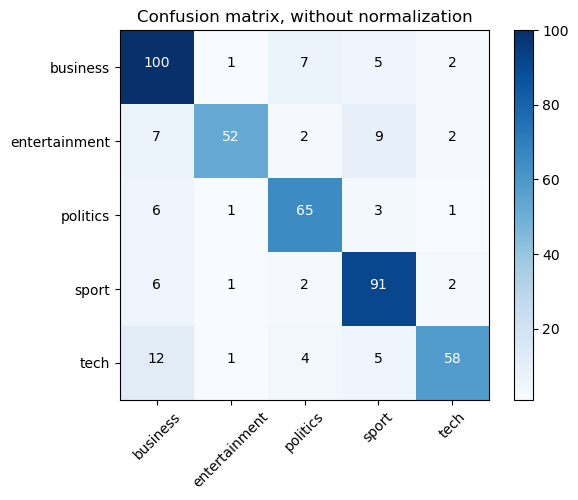

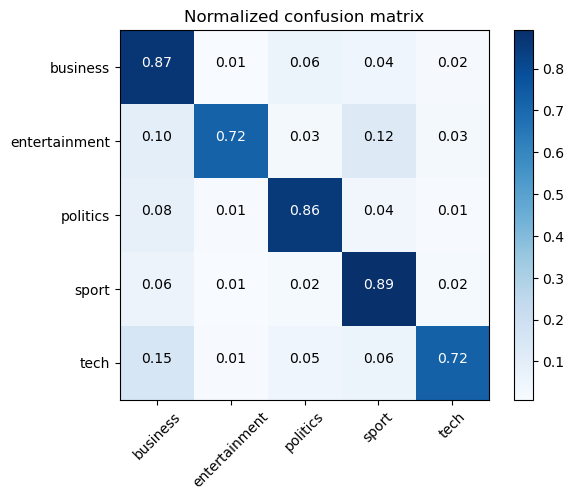

In [78]:
plt.figure()
plot_confusion_matrix(cnf_mat, classes=['business','entertainment','politics','sport','tech'],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_mat,['business','entertainment','politics','sport','tech'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [79]:
#Building pipeline for raw text transformation
clf_DT = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier()),
])

In [80]:
x_train, x_test, y_train, y_test = train_test_split(docs['Heading'],docs['Category'],
                                                   random_state=42, test_size=0.2)
print(f"Size of input training data is {x_train.shape}")
print(f"Size of input test data is {x_test.shape}")
print(f"Size of output training data is {y_train.shape}")
print(f"Size of output test data is {y_test.shape}")

Size of input training data is (1780,)
Size of input test data is (445,)
Size of output training data is (1780,)
Size of output test data is (445,)


In [81]:
model_Decision_Tree = clf_DT.fit(x_train,y_train) 

In [82]:
#Accuracy of the Decision Tree Classifier Model
model_score_Decision_Tree = "{:.2f}".format(model_Decision_Tree.score(x_test,y_test) * 100)
print(f"The Accuracy of the Decision Tree Classifier  Model is {model_score_Decision_Tree}%")
print(f"\n{model_score_Decision_Tree}% of the times the model predicts the correct category for the news articles")

The Accuracy of the Decision Tree Classifier  Model is 70.56%

70.56% of the times the model predicts the correct category for the news articles


In [83]:
#Predicting on the test data
y_pred_DT = model.predict(x_test)
y_pred_DT[:10]

array(['business', 'business', 'sport', 'business', 'politics', 'sport',
       'sport', 'business', 'sport', 'politics'], dtype='<U13')

In [84]:
#Building pipeline for raw text transformation
clf_RF = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()), 
])

In [85]:
x_train, x_test, y_train, y_test = train_test_split(docs['Heading'],docs['Category'],
                                                   random_state=42, test_size=0.2)
model_RF = clf_RF.fit(x_train,y_train)
mdl_score_RF = "{:.2f}".format(model_RF.score(x_test,y_test) * 100)
print(f"The Accuracy of the Random Forest Classifier Model is {mdl_score_RF}%")
print(f"\n{mdl_score_RF}% of the times the model predicts the correct category for the news articles")

The Accuracy of the Random Forest Classifier Model is 73.48%

73.48% of the times the model predicts the correct category for the news articles
